In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [12]:
df_A = pd.read_csv("Datasets\df_A.csv")
df_B = pd.read_csv("Datasets\df_B.csv")

In [13]:
# List of DataFrame names for location_A
df_names_A = [
    "A1_df", "A2_df", "A3_df", "A5_df", "A12_df", "A19_df", "A20_df", 
    "A23_df", "A24_df", "A25_df", "A26_df", "A27_df", "A28_df", 
    "A32_df", "A34_df", "A36_df", "A37_df", "A39_df", "A42_df", 
    "A43_df", "A44_df", "A45_df"
]

# Dictionary to store the imported DataFrames
location_A = {}

# Load each CSV file into a DataFrame
for df_name in df_names_A:
    csv_filename = f"Datasets\sensor_wise_data\{df_name}.csv"
    location_A[df_name] = pd.read_csv(csv_filename)

In [14]:
# List of DataFrame names for location_B
df_names_B = [
    "B4_df", "B6_df", "B8_df", "B9_df", "B10_df", "B11_df", "B13_df", 
    "B14_df", "B15_df", "B16_df", "B17_df", "B18_df", "B21_df", 
    "B29_df", "B30_df", "B31_df", "B33_df", "B35_df", "B38_df", 
    "B40_df", "B41_df"
]

# Dictionary to store the imported DataFrames
location_B = {}

# Load each CSV file into a DataFrame
for df_name in df_names_B:
    csv_filename = f"Datasets\sensor_wise_data\{df_name}.csv"
    location_B[df_name] = pd.read_csv(csv_filename)

In [15]:
location_B['B6_df']

,DATE_TIME,DATE,TIME,TIME_PERIOD,SEASON,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,2020-05-15,00:00:00,1,2,0.0,0.0,0.0,0.0,0.0,NaN,1.215279e+09,NaN,NaN,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,2020-05-15,00:15:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,2020-05-15,00:30:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,2020-05-15,00:45:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,2020-05-15,01:00:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.596148,25.088210,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,2020-06-17,22:45:00,5,3,0.0,0.0,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,0.0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,2020-06-17,23:00:00,5,3,0.0,0.0,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,0.0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,2020-06-17,23:15:00,5,3,0.0,0.0,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,0.0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,2020-06-17,23:30:00,5,3,0.0,0.0,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,0.0,23.291048,22.373909,0.0


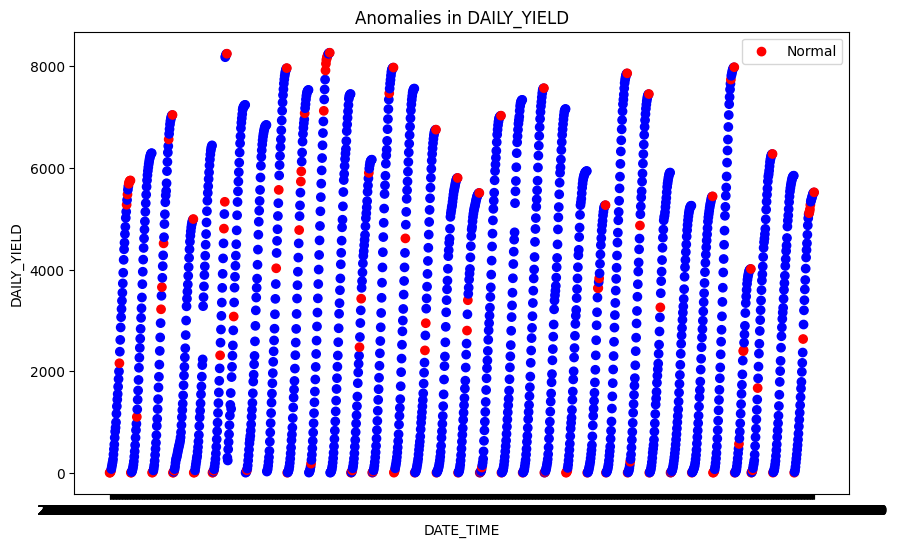

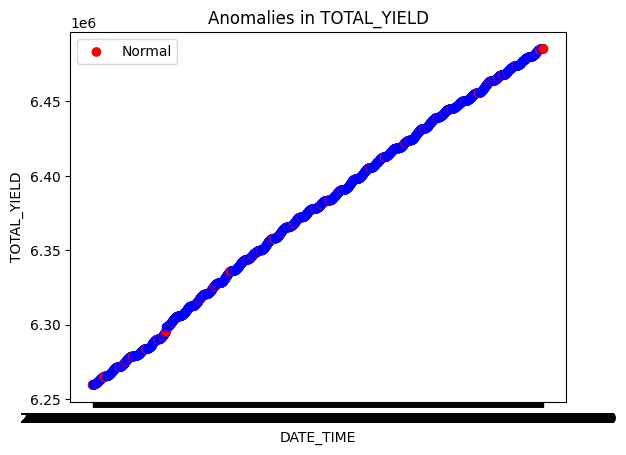

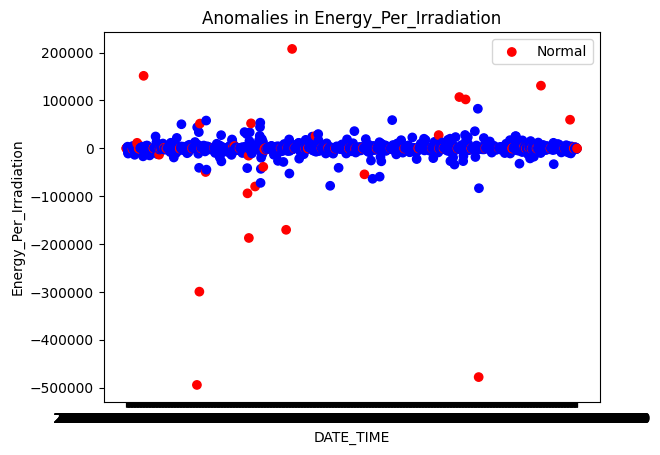

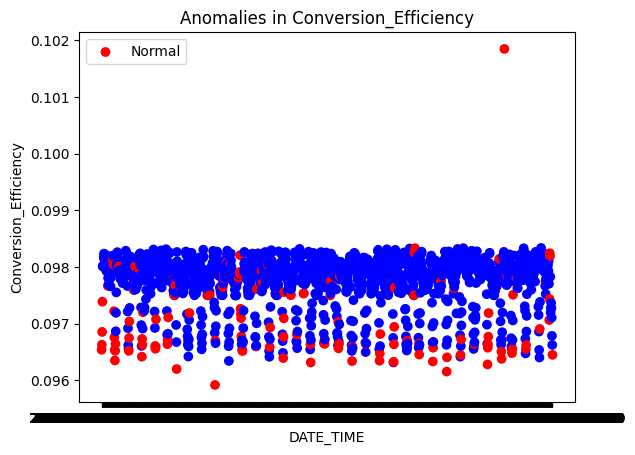

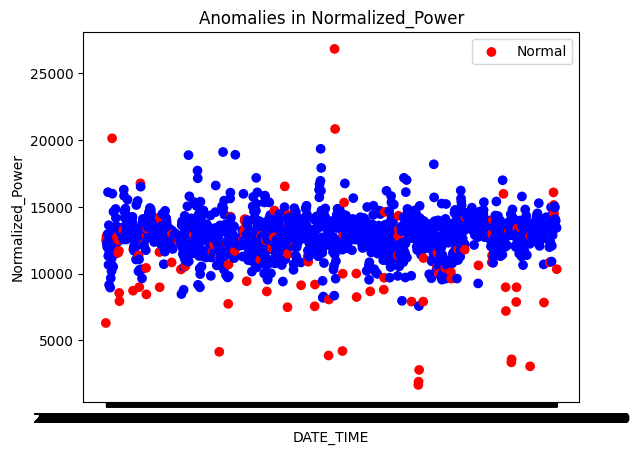

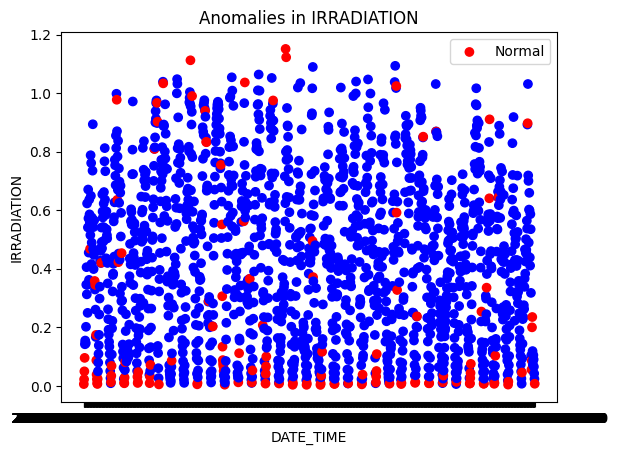

In [16]:
temp = location_A['A1_df'][location_A['A1_df']['TOTAL_YIELD'] > 0]
temp = temp[temp['TOTAL_YIELD_diff'] >= 0]
temp

# Select relevant features for anomaly detection
features = ['DAILY_YIELD', 'TOTAL_YIELD', 'TIME_PERIOD',
            'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION','Energy_Per_Irradiation','Normalized_Power','Conversion_Efficiency']

# df = location_B['B6_df'].copy()
# df = df[(df['DATE'] == '2020-05-22')]

df = temp
df.dropna(inplace=True)

# Prepare the data
data = df[features]

# Initialize and fit the IsolationForest model
isolation_forest = IsolationForest(n_estimators=200, contamination=0.08, random_state=0, max_samples=0.7)
df['anomaly_score'] = isolation_forest.fit_predict(data)

# Label anomalies (anomaly_score = -1 indicates an anomaly, 1 indicates normal)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Filter for anomalies
anomalies = df[df['is_anomaly'] == 'Anomaly']

# Save the anomalies to a CSV
# anomalies.to_csv('anomalies.csv', index=False)


plt.figure(figsize=(10, 6))
plt.scatter(df['DATE_TIME'], df['DAILY_YIELD'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('DAILY_YIELD')
plt.title('Anomalies in DAILY_YIELD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['TOTAL_YIELD'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('TOTAL_YIELD')
plt.title('Anomalies in TOTAL_YIELD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['Energy_Per_Irradiation'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('Energy_Per_Irradiation')
plt.title('Anomalies in Energy_Per_Irradiation')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['Conversion_Efficiency'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('Conversion_Efficiency')
plt.title('Anomalies in Conversion_Efficiency')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['Normalized_Power'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('Normalized_Power')
plt.title('Anomalies in Normalized_Power')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['IRRADIATION'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('IRRADIATION')
plt.title('Anomalies in IRRADIATION')
plt.legend(['Normal', 'Anomaly'])
plt.show()

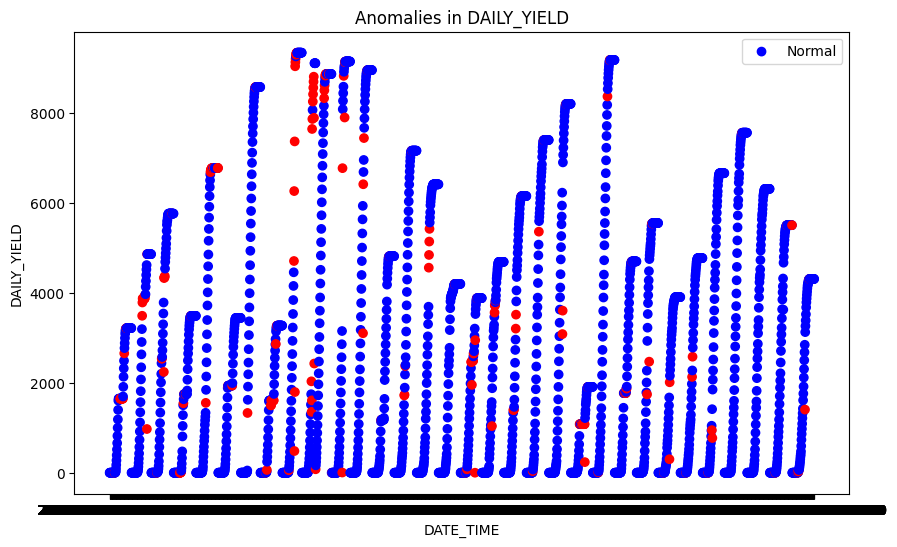

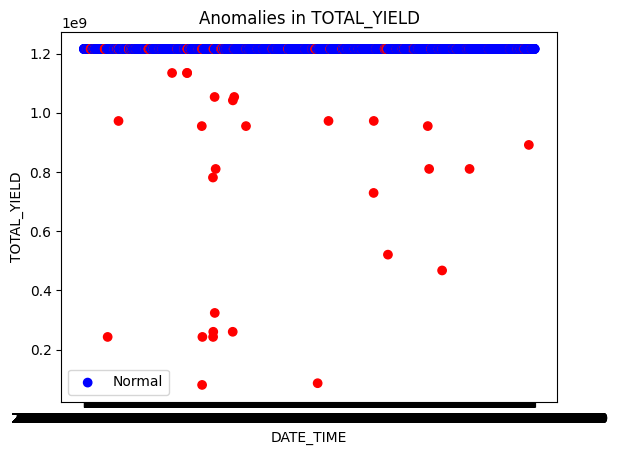

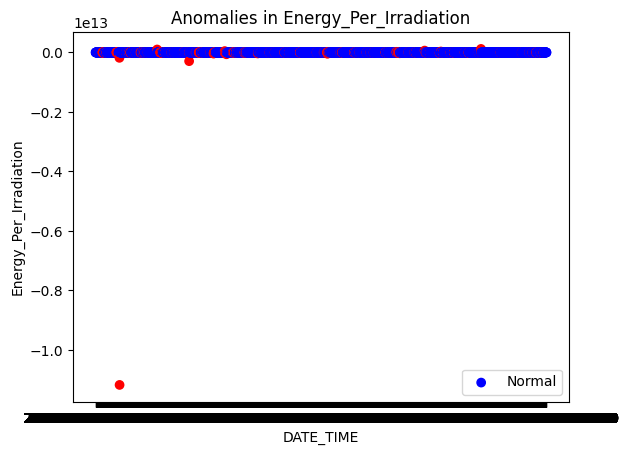

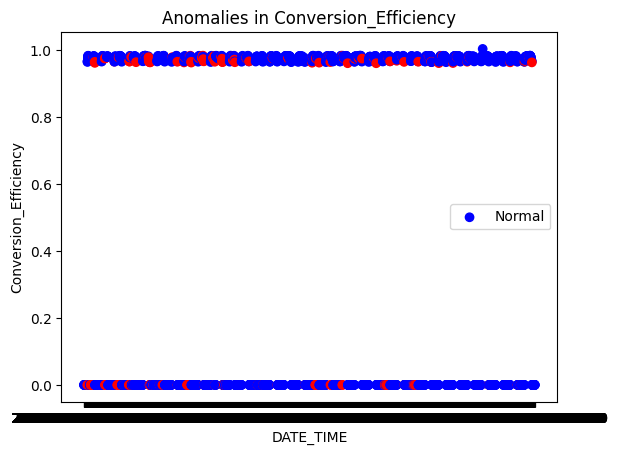

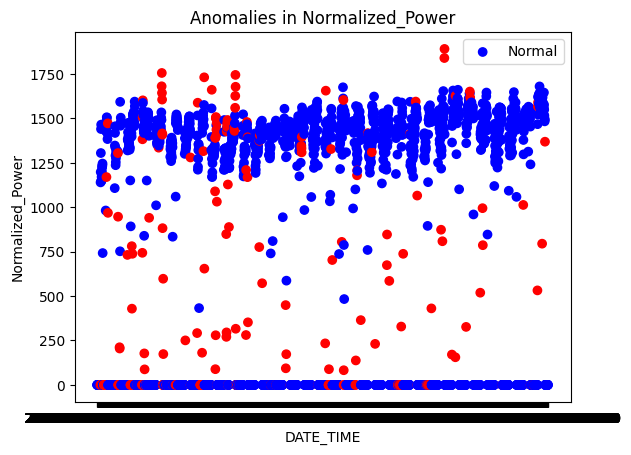

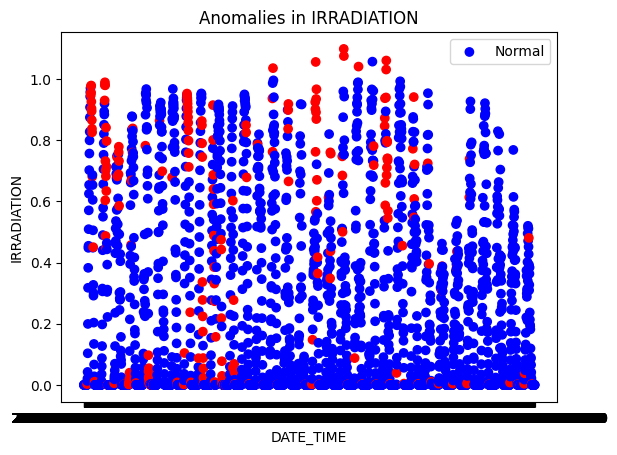

In [17]:
temp = location_B['B6_df'][location_B['B6_df']['TOTAL_YIELD'] > 0]
temp = temp[temp['TOTAL_YIELD_diff'] >= 0]
temp

# Select relevant features for anomaly detection
features = ['DAILY_YIELD', 'TOTAL_YIELD', 'TIME_PERIOD',
            'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION','Energy_Per_Irradiation','Normalized_Power','Conversion_Efficiency']

# df = location_B['B6_df'].copy()
# df = df[(df['DATE'] == '2020-05-22')]

df = temp
df.dropna(inplace=True)

# Prepare the data
data = df[features]

# Initialize and fit the IsolationForest model
isolation_forest = IsolationForest(n_estimators=200, contamination=0.08, random_state=0, max_samples=0.7)
df['anomaly_score'] = isolation_forest.fit_predict(data)

# Label anomalies (anomaly_score = -1 indicates an anomaly, 1 indicates normal)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Filter for anomalies
anomalies = df[df['is_anomaly'] == 'Anomaly']

# Save the anomalies to a CSV
# anomalies.to_csv('anomalies.csv', index=False)


plt.figure(figsize=(10, 6))
plt.scatter(df['DATE_TIME'], df['DAILY_YIELD'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('DAILY_YIELD')
plt.title('Anomalies in DAILY_YIELD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['TOTAL_YIELD'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('TOTAL_YIELD')
plt.title('Anomalies in TOTAL_YIELD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['Energy_Per_Irradiation'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('Energy_Per_Irradiation')
plt.title('Anomalies in Energy_Per_Irradiation')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['Conversion_Efficiency'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('Conversion_Efficiency')
plt.title('Anomalies in Conversion_Efficiency')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['Normalized_Power'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('Normalized_Power')
plt.title('Anomalies in Normalized_Power')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['IRRADIATION'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('IRRADIATION')
plt.title('Anomalies in IRRADIATION')
plt.legend(['Normal', 'Anomaly'])
plt.show()

In [18]:
df_names_A = [
    "A1_df", "A2_df", "A3_df", "A5_df", "A12_df", "A19_df", "A20_df", 
    "A23_df", "A24_df", "A25_df", "A26_df", "A27_df", "A28_df", 
    "A32_df", "A34_df", "A36_df", "A37_df", "A39_df", "A42_df", 
    "A43_df", "A44_df", "A45_df"
]

for df_name in df_names_A:
    temp = location_A[df_name][location_A[df_name]['TOTAL_YIELD'] > 0].copy()
    temp = temp[temp['TOTAL_YIELD_diff'] >= 0]

    # Select relevant features for anomaly detection
    features = ['DAILY_YIELD', 'TOTAL_YIELD', 'TIME_PERIOD',
                'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION','Energy_Per_Irradiation','Normalized_Power','Conversion_Efficiency']
    df = temp
    df.dropna(inplace=True)

    # Prepare the data
    data = df[features]

    # Initialize and fit the IsolationForest model
    isolation_forest = IsolationForest(n_estimators=200, contamination=0.05, random_state=0, max_samples=0.7)
    df['anomaly_score'] = isolation_forest.fit_predict(data)

    # Label anomalies (anomaly_score = -1 indicates an anomaly, 1 indicates normal)
    df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')


    final_df = df[df['is_anomaly'] == 'Normal']

    final_df.drop(columns=['is_anomaly', 'anomaly_score'], inplace=True)

    final_df.to_csv(f"Datasets\Anti_Anomaly_data\Anti_Anomaly_{df_name}.csv", index=False)

C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_22792\33337262.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['is_anomaly', 'anomaly_score'], inplace=True)
C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_22792\33337262.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['is_anomaly', 'anomaly_score'], inplace=True)
C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_22792\33337262.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [19]:
df_names_B = [
    "B4_df", "B6_df", "B8_df", "B9_df", "B10_df", "B11_df", "B13_df", 
    "B14_df", "B15_df", "B16_df", "B17_df", "B18_df", "B21_df", 
    "B29_df", "B30_df", "B31_df", "B33_df", "B35_df", "B38_df", 
    "B40_df", "B41_df"
]

for df_name in df_names_B:
    temp = location_B[df_name][location_B[df_name]['TOTAL_YIELD'] > 0].copy()
    temp = temp[temp['TOTAL_YIELD_diff'] >= 0]

    # Select relevant features for anomaly detection
    features = ['DAILY_YIELD', 'TOTAL_YIELD', 'TIME_PERIOD',
                'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION','Energy_Per_Irradiation','Normalized_Power','Conversion_Efficiency']

    df = temp
    df.dropna(inplace=True)

    # Prepare the data
    data = df[features]

    # Initialize and fit the IsolationForest model
    isolation_forest = IsolationForest(n_estimators=200, contamination=0.05, random_state=0, max_samples=0.7)
    df['anomaly_score'] = isolation_forest.fit_predict(data)

    # Label anomalies (anomaly_score = -1 indicates an anomaly, 1 indicates normal)
    df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')


    final_df = df[df['is_anomaly'] == 'Normal']

    final_df.drop(columns=['is_anomaly', 'anomaly_score'], inplace=True)

    final_df.to_csv(f"Datasets\Anti_Anomaly_data\Anti_Anomaly_{df_name}.csv", index=False)

C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_22792\2964622318.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['is_anomaly', 'anomaly_score'], inplace=True)
C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_22792\2964622318.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['is_anomaly', 'anomaly_score'], inplace=True)
C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_22792\2964622318.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta